In [2]:
library(readxl)
library(tidyverse)
library(reshape)

library(RColorBrewer)

# Import data

In [20]:
demographics_sum = read_excel('Demographics.xlsx',sheet = 'SUM')
head(demographics_sum)

New names:
* `` -> ...6
* `` -> ...8
* `` -> ...9
* `` -> ...10
* `` -> ...11
* ...



Demographic,Levels,Pilot Study,Study1,Study2,...6,Study3,...8,...9,...10,...,...16,...17,...18,...19,...20,...21,...22,...23,...24,...25
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,NA,Category,Survey,AU,UK,US,ZA,...,IL,CN,HK,JP,RU,DE,BR,PT,MX,CL
Age,< 18,0,0,NA,0,1,0,1,0,...,0,28,1,0,0,0,0,0,0,5
NA,18-24,42,108,NA,5,87,67,42,223,...,117,2025,158,11,43,126,68,240,184,195
NA,25 - 34,226,318,NA,9,217,196,171,404,...,256,2073,332,223,111,257,313,215,297,276
NA,35 - 44,160,186,NA,0,134,183,138,72,...,126,477,102,189,171,113,146,68,47,46
NA,45 - 54,77,97,NA,0,67,88,95,28,...,73,105,25,100,177,41,50,37,20,14


# Age

In [7]:
Age = demographics_sum[-c(5,6)] # remove Study2
Age_col = colnames(Age)[1:4]
for (region in Age[1,5:23]){
    Age_col = c(Age_col,region)
}
Age_col = gsub('Pilot Study','Pilot_Study',Age_col)
Age = Age[2:11,] # abstract age
colnames(Age) = Age_col

Age[3:23] = lapply(Age[3:23],function(x){as.numeric(x)}) # transfer into numeric
Age[3:23] = lapply(Age[3:23], function(x) x / sum(x)) # transfer to percentage

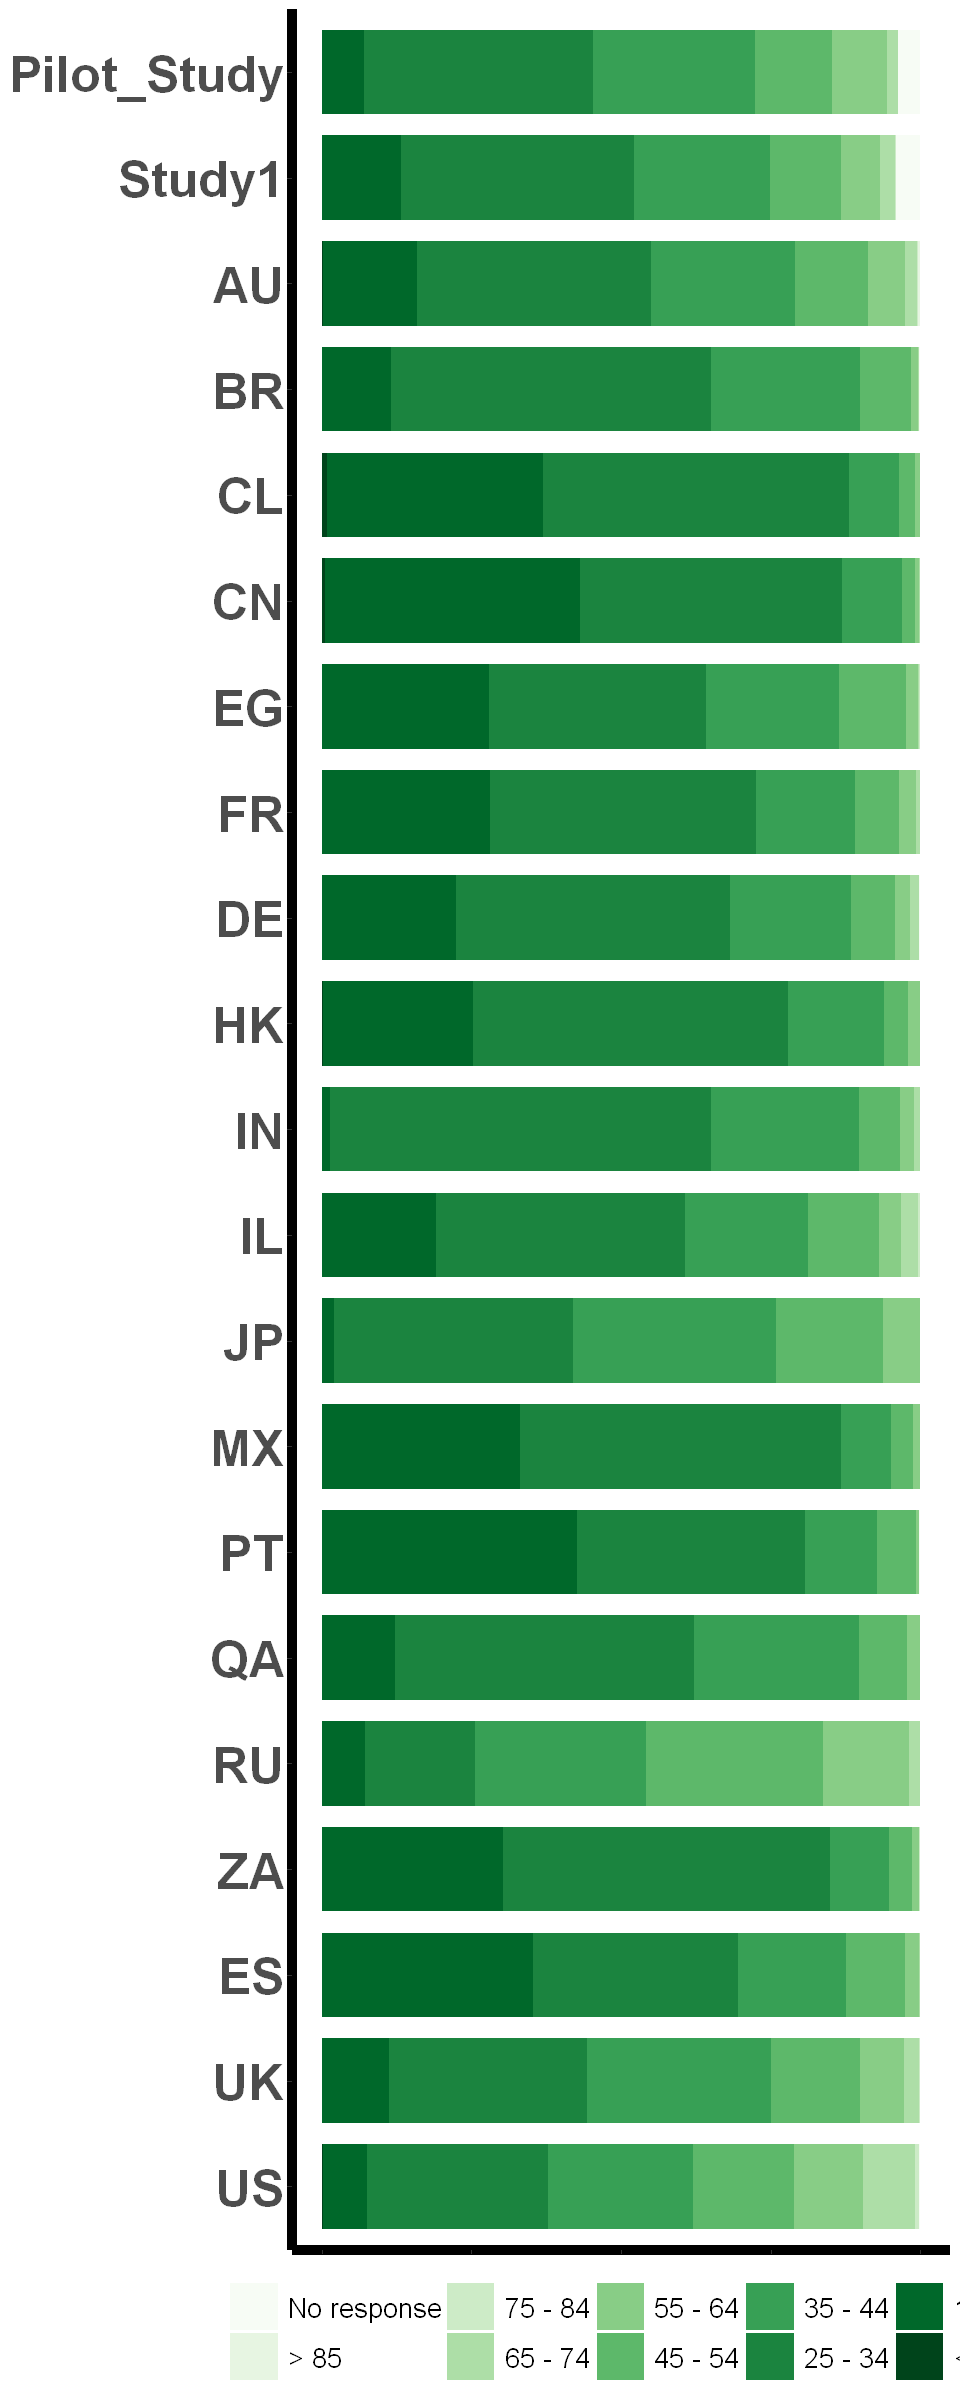

In [87]:
Age_plot = Age[2:23] %>% group_by(Levels) %>% 
           gather(key = "Study", value = 'per',colnames(Age)[3:23])

Age_plot$'Study' = factor(Age_plot$'Study', levels=rev(c('Pilot_Study','Study1',
        'AU','BR','CL','CN','EG','FR','DE','HK','IN','IL','JP','MX','PT',
        'QA','RU','ZA','ES','UK','US'))) 
Age_plot$'Levels' = factor(Age_plot$'Levels', 
            levels=rev(c('< 18','18-24','25 - 34','35 - 44',
            '45 - 54','55 - 64','65 - 74','75 - 84','> 85','No response')))

options(repr.plot.height=20,repr.plot.width=8)
ggplot(Age_plot,aes(x=Study,y=per,fill=Levels))+
geom_bar(stat='identity', width=0.8)+
scale_fill_manual(values=colorRampPalette(brewer.pal(n=9,name ="Greens"))(10))+
coord_flip()+
theme_classic()+
theme(axis.text=element_text(size=30,face='bold'),
      axis.text.x=element_blank(),
      axis.title=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.position='bottom',legend.key.size = unit(30,'pt'),
      legend.text=element_text(size=16),legend.title=element_blank()) + 
guides(fill = guide_legend(nrow = 2))

In [85]:
png("../output_graph/demographics/age.png", bg="transparent",
    family = 'sans',units='in',width=8,height=20,res=300)
ggplot(Age_plot,aes(x=Study,y=per,fill=Levels))+
geom_bar(stat='identity', width=0.8)+
scale_fill_manual(values=colorRampPalette(brewer.pal(n=9,name ="Greens"))(10))+
coord_flip()+
theme_classic()+
theme(axis.text=element_blank(),
      axis.title=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.position='none') + 
guides(fill = guide_legend(nrow = 2))
dev.off()

png 
  2

In [76]:
brewer.pal(n=9,name ="Greens")
colorRampPalette(rev(brewer.pal(n=9,name ="Greens")))(10)

[1] "#F7FCF5" "#E5F5E0" "#C7E9C0" "#A1D99B" "#74C476" "#41AB5D" "#238B45"
[8] "#006D2C" "#00441B"

[1] "#00441B" "#00682A" "#1B843F" "#36A055" "#5DB86A" "#88CD86" "#ADDEA7"
 [8] "#CDEBC7" "#E7F5E2" "#F7FCF5"

# Gender

In [88]:
Gender = demographics_sum[-c(5,6)] # remove Study2
Gender = Gender[12:14,] # abstract gender
colnames(Gender) = Age_col

Gender[3:23] = lapply(Gender[3:23],function(x){gsub('—',0,x)})
Gender[3:23] = lapply(Gender[3:23],function(x){as.numeric(x)}) # transfer into numeric
Gender[3:23] = lapply(Gender[3:23], function(x) x / sum(x)) # transfer to percentage

Gender$'Levels' = factor(Gender$'Levels', 
                         levels=c('Female','Male','Prefer not to answer'))

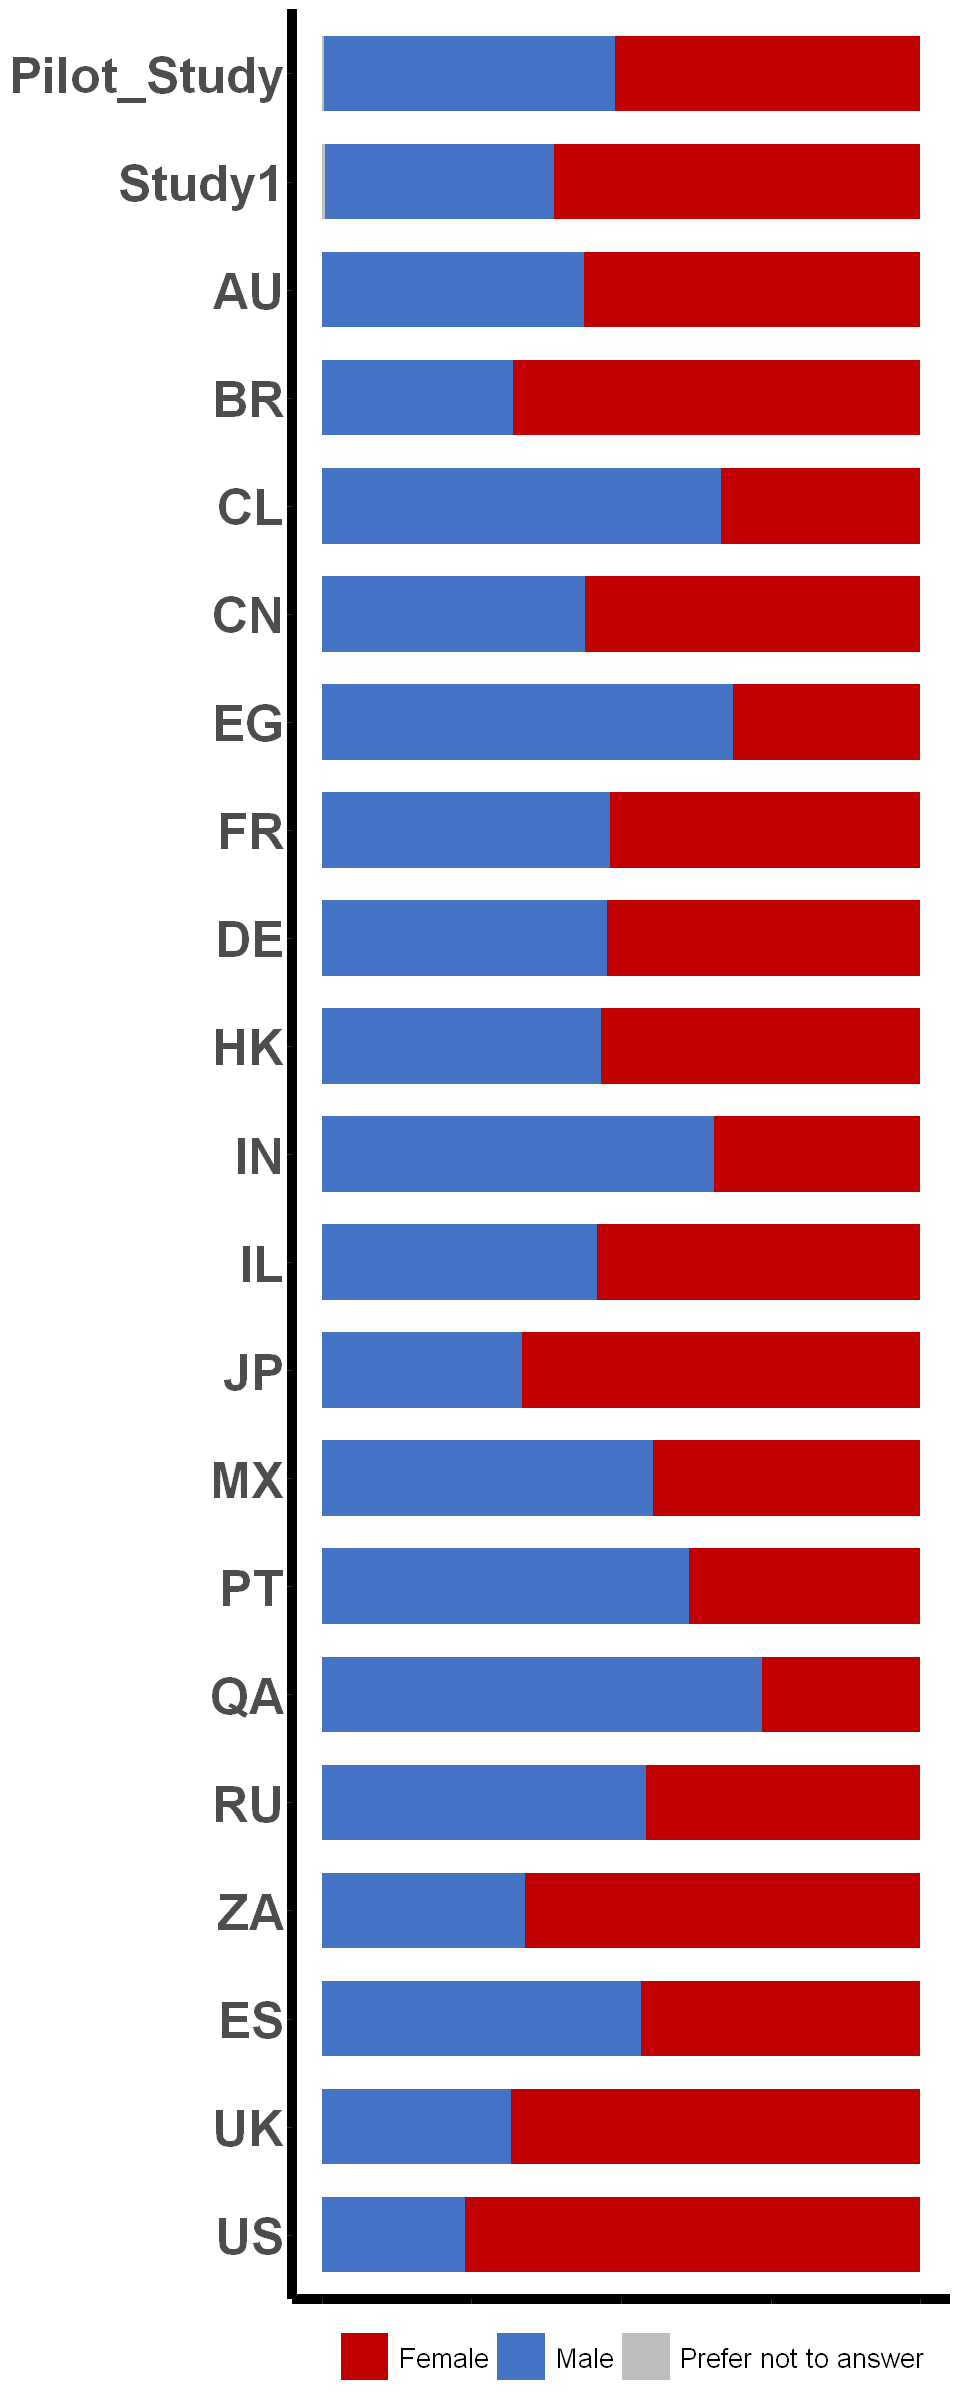

In [90]:
Gender_plot = Gender[2:23] %>% group_by(Levels) %>% 
           gather(key = "Study", value = 'per',colnames(Gender)[3:23])

Gender_plot$'Study' = factor(Gender_plot$'Study', levels=rev(c('Pilot_Study','Study1',
        'AU','BR','CL','CN','EG','FR','DE','HK','IN','IL','JP','MX','PT',
        'QA','RU','ZA','ES','UK','US')))  

options(repr.plot.height=20,repr.plot.width=8)
ggplot(Gender_plot,aes(x=Study,y=per,fill=Levels))+
geom_bar(stat='identity', width=0.7)+
scale_fill_manual(values=c('Female'='#C00000','Male'='#4472C4','Prefer not to answer'='grey'))+
theme_classic()+
theme(axis.text=element_text(size=30,face='bold'),
      axis.text.x=element_blank(),
      axis.title=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.position='bottom',legend.key.size = unit(30,'pt'),
      legend.text=element_text(size=16),legend.title=element_blank()) + 
coord_flip()

In [92]:
png("../output_graph/demographics/gender.png", bg="transparent",
    family = 'sans',units='in',width=8,height=20,res=300)
ggplot(Gender_plot,aes(x=Study,y=per,fill=Levels))+
geom_bar(stat='identity', width=0.7)+
scale_fill_manual(values=c('Female'='#C00000','Male'='#4472C4','Prefer not to answer'='grey'))+
theme_classic()+
theme(axis.text=element_blank(),
      axis.title=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.position='none') + 
coord_flip()
dev.off()

png 
  2

# Education

In [93]:
Education = demographics_sum[-c(5,6)] # remove Study2
Education = Education[16:25,] # abstract Education
colnames(Education) = Age_col
Education[3:23] = lapply(Education[3:23],function(x){as.numeric(x)}) # transfer into numeric
Education[3:23] = lapply(Education[3:23], function(x) x / sum(x)) # transfer to percentage
                         
Education$'Levels' = factor(Education$'Levels', 
    levels=rev(c('Don\'t know/No answer','Early childhood education/ no education','Primary education',
                 'Lower secondary education','Upper secondary education',
                 'Post-secondary non-tertiary education','Short-cycle tertiary education',
                'Bachelor or equivalent','Master or equivalent',
                'Doctoral or equivalent')))

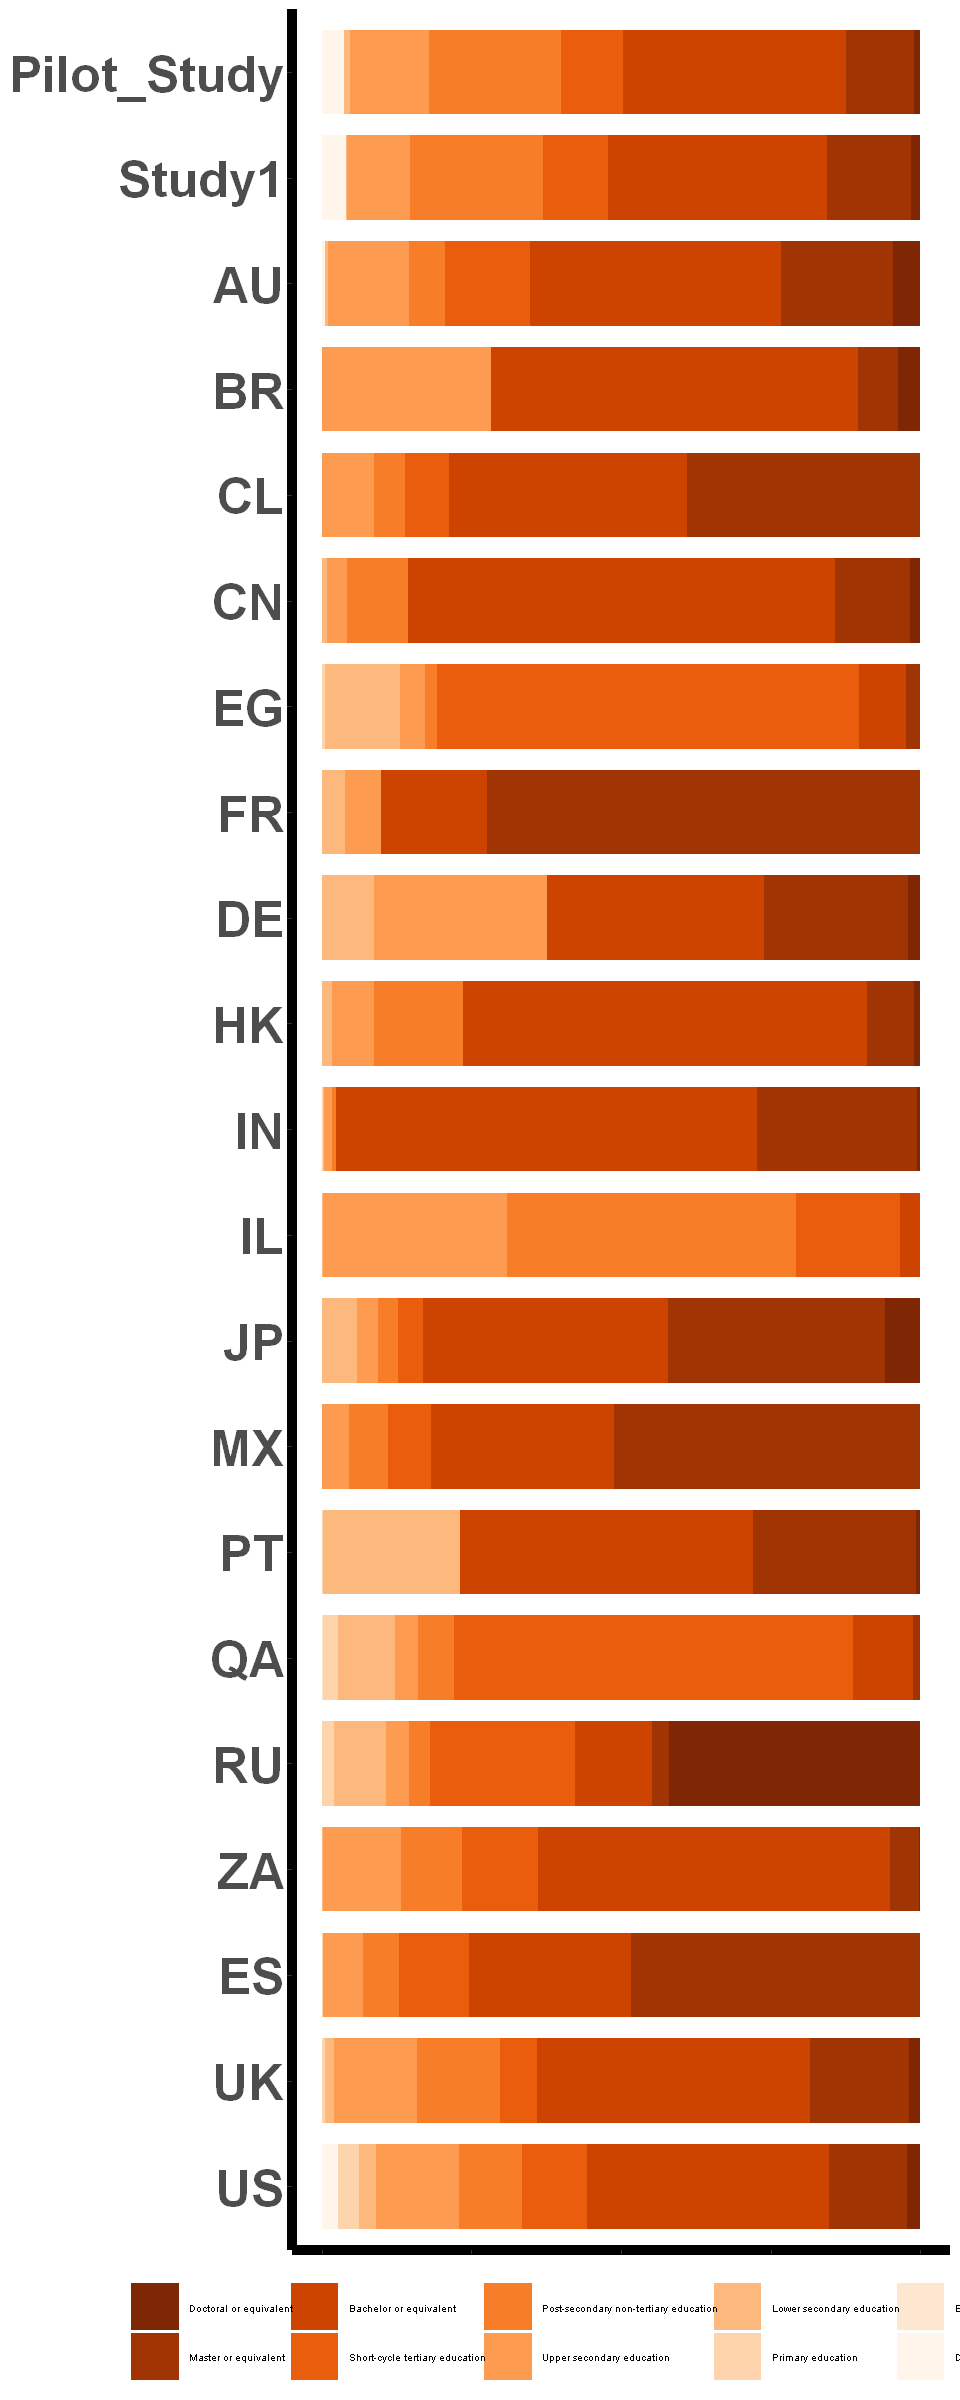

In [97]:
Education_plot = Education[2:23] %>% group_by(Levels) %>% 
           gather(key = "Study", value = 'per',colnames(Education)[3:23])

Education_plot$'Study' = factor(Education_plot$'Study', levels=rev(c('Pilot_Study','Study1',
        'AU','BR','CL','CN','EG','FR','DE','HK','IN','IL','JP','MX','PT',
        'QA','RU','ZA','ES','UK','US')))  

options(repr.plot.height=20,repr.plot.width=8)
ggplot(Education_plot,aes(x=Study,y=per,fill=Levels))+
geom_bar(stat='identity', width=0.8)+
scale_fill_manual(values=colorRampPalette(rev(brewer.pal(n=9,name ="Oranges")))(10))+
coord_flip()+
theme_classic()+
theme(axis.text=element_text(size=30,face='bold'),
      axis.text.x=element_blank(),
      axis.title=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.position='bottom',legend.key.size = unit(30,'pt'),
      legend.text=element_text(size=6),legend.title=element_blank()) + 
guides(fill = guide_legend(nrow = 2))

In [96]:
png("../output_graph/demographics/education.png", bg="transparent",
    family = 'sans',units='in',width=8,height=20,res=300)
ggplot(Education_plot,aes(x=Study,y=per,fill=Levels))+
geom_bar(stat='identity', width=0.8)+
scale_fill_manual(values=colorRampPalette(rev(brewer.pal(n=9,name ="Oranges")))(10))+
coord_flip()+
theme_classic()+
theme(axis.text=element_blank(),
      axis.title=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.position='none') + 
guides(fill = guide_legend(nrow = 2))
dev.off()

png 
  2

# Ethnicity

In [8]:
library(ggpubr)
library(ggsci)
library(paletteer) # show palettee

In [24]:
Ethnicity = demographics_sum[-c(5,6)] # remove Study2
Ethnicity = Ethnicity[26:52,] # abstract Ethnicity
colnames(Ethnicity) = Age_col

In [10]:
Ethnicity$'Levels'

[1] "White"                               "Black"                              
 [3] "South Asian Indian, Pakistani, etc." "East Asian Chinese, Japanese, etc." 
 [5] "Arabic, Central Asian"               "Asian (in general)"                 
 [7] "Han"                                 "Yamato Ethnic Group"                
 [9] "Ryukyu Peoples"                      "Ainu Ethnicity"                     
[11] "Russian"                             "Tatar"                              
[13] "Ukrainian"                           "Belorussian"                        
[15] "Jewish"                              "German"                             
[17] "Dane"                                "Sorbian"                            
[19] "Brown or mulatto"                    "Indigenous"                         
[21] "Portuguese"                          "Latino"                             
[23] "Mestizo"                             "Mulatto"                            
[25] "American Indian or Alaska Native"    "Native Hawaiian or Pacific Islander"
[27] "Other (write in)/No answer"

In [11]:
paletteer_d("ggsci::schwifty_rickandmorty")
paletteer_d("colorBlindness::paletteMartin")
paletteer_d("ggthemes::calc")

<colors>
#FAFD7CFF #82491EFF #24325FFF #B7E4F9FF #FB6467FF #526E2DFF #E762D7FF #E89242FF #FAE48BFF #A6EEE6FF #917C5DFF #69C8ECFF 

<colors>
#000000FF #004949FF #009292FF #FF6DB6FF #FFB6DBFF #490092FF #006DDBFF #B66DFFFF #6DB6FFFF #B6DBFFFF #920000FF #924900FF #DB6D00FF #24FF24FF #FFFF6DFF 

<colors>
#004586FF #FF420EFF #FFD320FF #579D1CFF #7E0021FF #83CAFFFF #314004FF #AECF00FF #4B1F6FFF #FF950EFF #C5000BFF #0084D1FF 

In [56]:
df = Ethnicity[c('Levels','Pilot_Study')] 
colnames(df) = c('Levels','study')
df = df %>% filter(study!='—')
df$'study' = as.numeric(df$'study')

others = df[df$'Levels'=='Asian (in general)',]$'study'+
         df[df$'Levels'=='American Indian or Alaska Native',]$'study'+
         df[df$'Levels'=='Native Hawaiian or Pacific Islander',]$'study'+
         df[df$'Levels'=='Other (write in)/No answer',]$'study'
others_df = c('Others',others)
df = rbind(df,others_df)
df$'mylabel' = ''
df[-which(df$'Levels'%in%c('Asian (in general)','American Indian or Alaska Native',
            'Native Hawaiian or Pacific Islander','Other (write in)/No answer')),]

Levels,study,mylabel
<chr>,<chr>,<chr>
White,496,
Black,43,
Others,53,


In [57]:
df

Levels,study,mylabel
<chr>,<chr>,<chr>
White,496,
Black,43,
Asian (in general),14,
American Indian or Alaska Native,5,
Native Hawaiian or Pacific Islander,1,
Other (write in)/No answer,33,
Others,53,


In [96]:
circle_bar = function(select_study){
    df = Ethnicity[c('Levels',select_study)] 
    colnames(df) = c('Levels','study')
    df = df %>% filter(study!='—')
    df$'study' = as.numeric(df$'study')
    df$'mylabel' = ''
#     myLabel = as.vector(df$Levels) 
#     myLabel = gsub('Asian (in general)','Asian',myLabel,fixed=TRUE)
#     myLabel = paste(myLabel, "(", round(df$study / sum(df$study) * 100, 2), "%)", sep = "")
    
    options(repr.plot.height=5,repr.plot.width=5)
    if (select_study %in% c('Pilot_Study','Study1')){
        mypalette=c('#FAFD7CFF','#FB6467FF','#0084D1FF',
                    '#C5000BFF','#4B1F6FFF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black','Asian (in general)',
                    'American Indian or Alaska Native','Native Hawaiian or Pacific Islander',
                    'Other (write in)/No answer'))}   
    if (select_study %in% c('AU','UK','US','ZA','FR','QA','EG','IN','IL')){
        mypalette = c('#FAFD7CFF','#FB6467FF','#82491EFF',
                     '#B7E4F9FF','#526E2DFF','#24325FFF')
        #rev(paletteer_d("ggsci::schwifty_rickandmorty")[1:6])
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black','South Asian Indian, Pakistani, etc.',
                      'East Asian Chinese, Japanese, etc.','Arabic, Central Asian',
                      'Other (write in)/No answer'))}
    if (select_study %in% c('ES')){
        mypalette = c('#FAFD7CFF','#FB6467FF','#82491EFF',
                     '#B7E4F9FF','#526E2DFF','#0084D1FF',
                      '#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black','South Asian Indian, Pakistani, etc.',
                      'East Asian Chinese, Japanese, etc.','Arabic, Central Asian',
                      'Asian (in general)',
                      'Other (write in)/No answer'))
    }
    if (select_study %in% c('CN','HK')){mypalette=c('#A6EEE6FF','#24325FFF')}
    if (select_study %in% c('JP')){
        mypalette=c('#E89242FF','#FAE48BFF','#69C8ECFF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('Yamato Ethnic Group','Ryukyu Peoples',
                               'Ainu Ethnicity','Other (write in)/No answer'))}
    if (select_study %in% c('RU')){
        mypalette=c('#004949FF','#009292FF','#FF6DB6FF','#924900FF','#B6DBFFFF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('Russian','Tatar','Ukrainian','Belorussian','Jewish',
                              'Other (write in)/No answer'))}
    if (select_study %in% c('DE')){
        mypalette=c('#FFB6DBFF','#490092FF','#FF6DB6FF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('German','Dane','Sorbian','Other (write in)/No answer'))}
    if (select_study %in% c('BR')){
        mypalette=c('#FAFD7CFF','#FB6467FF','#B7E4F9FF',
                    '#006DDBFF','#24FF24FF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black','East Asian Chinese, Japanese, etc.',
                               'Brown or mulatto','Indigenous','Other (write in)/No answer'))}
    if (select_study %in% c('MX')){
        mypalette=c('#FAFD7CFF','#FB6467FF','#82491EFF',
                    '#B7E4F9FF','#526E2DFF',
                    '#0084D1FF','#9966FF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black','South Asian Indian, Pakistani, etc.',
                               'East Asian Chinese, Japanese, etc.','Arabic, Central Asian',
                               'Asian (in general)','Latino','Other (write in)/No answer'))}
    if (select_study %in% c('CL')){
        mypalette=c('#FAFD7CFF','#FB6467FF','#0084D1FF','#24FF24FF',
                    '#579D1CFF','#FFD320FF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black','Asian (in general)','Indigenous',
                               'Mestizo','Mulatto','Other (write in)/No answer'))}
    if (select_study %in% c('PT')){mypalette=c('#24325FFF','#AECF00FF')}
    ggdonutchart(df, "study",label="mylabel",
                 fill = "Levels",                            
                 color = "white", 
                 font.family = 'Arial',
                 palette = mypalette)+
    theme(legend.position='none')
}

In [94]:
circle_bar_simple = function(select_study){
    df = Ethnicity[c('Levels',select_study)] 
    colnames(df) = c('Levels','study')
    df = df %>% filter(study!='—')
    df$'study' = as.numeric(df$'study')
#     myLabel = as.vector(df$Levels) 
#     myLabel = gsub('Asian (in general)','Asian',myLabel,fixed=TRUE)
#     myLabel = paste(myLabel, "(", round(df$study / sum(df$study) * 100, 2), "%)", sep = "")
    
    options(repr.plot.height=5,repr.plot.width=5)
    if (select_study %in% c('Pilot_Study','Study1')){
        others = df[df$'Levels'=='Asian (in general)',]$'study'+
                 df[df$'Levels'=='American Indian or Alaska Native',]$'study'+
                 df[df$'Levels'=='Native Hawaiian or Pacific Islander',]$'study'+
                 df[df$'Levels'=='Other (write in)/No answer',]$'study'
        others_df = c('Others',others)
        df = rbind(df,others_df)
        df=df[-which(df$'Levels'%in%c('Asian (in general)','American Indian or Alaska Native',
            'Native Hawaiian or Pacific Islander','Other (write in)/No answer')),]
        
        mypalette=c('#FAFD7CFF','#FB6467FF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black','Others'))}   
    if (select_study %in% c('AU','UK','US','ZA','FR','QA','EG','IN','IL')){
        mypalette = c('#FAFD7CFF','#FB6467FF','#82491EFF',
                     '#B7E4F9FF','#526E2DFF','#24325FFF')
        #rev(paletteer_d("ggsci::schwifty_rickandmorty")[1:6])
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black','South Asian Indian, Pakistani, etc.',
                      'East Asian Chinese, Japanese, etc.','Arabic, Central Asian',
                      'Other (write in)/No answer'))}
    if (select_study %in% c('ES')){
        mypalette = c('#FAFD7CFF','#FB6467FF','#82491EFF',
                     '#B7E4F9FF','#526E2DFF','#0084D1FF',
                      '#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black','South Asian Indian, Pakistani, etc.',
                      'East Asian Chinese, Japanese, etc.','Arabic, Central Asian',
                      'Asian (in general)',
                      'Other (write in)/No answer'))
    }
    if (select_study %in% c('CN','HK')){mypalette=c('#A6EEE6FF','#24325FFF')}
    if (select_study %in% c('JP')){
        mypalette=c('#E89242FF','#FAE48BFF','#69C8ECFF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('Yamato Ethnic Group','Ryukyu Peoples',
                               'Ainu Ethnicity','Other (write in)/No answer'))}
    if (select_study %in% c('RU')){
        others = df[df$'Levels'=='Tatar',]$'study'+
             df[df$'Levels'=='Ukrainian',]$'study'+
             df[df$'Levels'=='Belorussian',]$'study'+
             df[df$'Levels'=='Jewish',]$'study'+
             df[df$'Levels'=='Other (write in)/No answer',]$'study'
        others_df = c('Others',others)
        df = rbind(df,others_df)
        df=df[-which(df$'Levels'%in%c('Tatar','Ukrainian','Belorussian','Jewish',
                                'Other (write in)/No answer')),]
        
        mypalette=c('#004949FF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('Russian','Others'))}
    if (select_study %in% c('DE')){
        others = df[df$'Levels'=='Sorbian',]$'study'+
        df[df$'Levels'=='Other (write in)/No answer',]$'study'
        
        others_df = c('Others',others)
        df = rbind(df,others_df)
        df=df[-which(df$'Levels'%in%c('Sorbian','Other (write in)/No answer')),]
        
        mypalette=c('#FFB6DBFF','#490092FF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('German','Dane','Others'))}
    if (select_study %in% c('BR')){
        others = df[df$'Levels'=='Indigenous',]$'study'+
        df[df$'Levels'=='Other (write in)/No answer',]$'study'
        others_df = c('Others',others)
        df = rbind(df,others_df)
        df=df[-which(df$'Levels'%in%c('Indigenous','Other (write in)/No answer')),]
        
        mypalette=c('#FAFD7CFF','#FB6467FF','#B7E4F9FF',
                    '#006DDBFF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black','East Asian Chinese, Japanese, etc.',
                               'Brown or mulatto','Others'))}
    
    if (select_study %in% c('MX')){
        others = df[df$'Levels'=='Asian (in general)',]$'study'+
        df[df$'Levels'=='Other (write in)/No answer',]$'study'
        others_df = c('Others',others)
        df = rbind(df,others_df)
        df=df[-which(df$'Levels'%in%c('Asian (in general)','Other (write in)/No answer')),]
        
        mypalette=c('#FAFD7CFF','#FB6467FF','#82491EFF',
                    '#B7E4F9FF','#526E2DFF',
                    '#9966FF','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black','South Asian Indian, Pakistani, etc.',
                               'East Asian Chinese, Japanese, etc.','Arabic, Central Asian',
                               'Latino','Others'))}
    if (select_study %in% c('CL')){
        others = df[df$'Levels'=='Asian (in general)',]$'study'+
        df[df$'Levels'=='Indigenous',]$'study'+
        df[df$'Levels'=='Mulatto',]$'study'+
        df[df$'Levels'=='Other (write in)/No answer',]$'study'
        others_df = c('Others',others)
        df = rbind(df,others_df)
        df=df[-which(df$'Levels'%in%c('Asian (in general)','Indigenous',
                                'Mulatto','Other (write in)/No answer')),]
        
        mypalette=c('#FAFD7CFF','#FB6467FF',
                    '#CC3300','#24325FFF')
        df$'Levels' = factor(df$'Levels',
                      levels=c('White','Black',
                               'Mestizo','Others'))}
    if (select_study %in% c('PT')){mypalette=c('#24325FFF','#AECF00FF')}
    df$'study' = as.numeric(df$'study')
    df$'mylabel' = ''
    ggdonutchart(df, "study",label="mylabel",
                 fill = "Levels",                            
                 color = "white", 
                 font.family = 'Arial',
                 palette = mypalette)+
    theme(legend.position='none')
}

## Pilot Study/Study1/AU/UK/US/ZA/FR/QA/EG/IN/IL

png 
  2

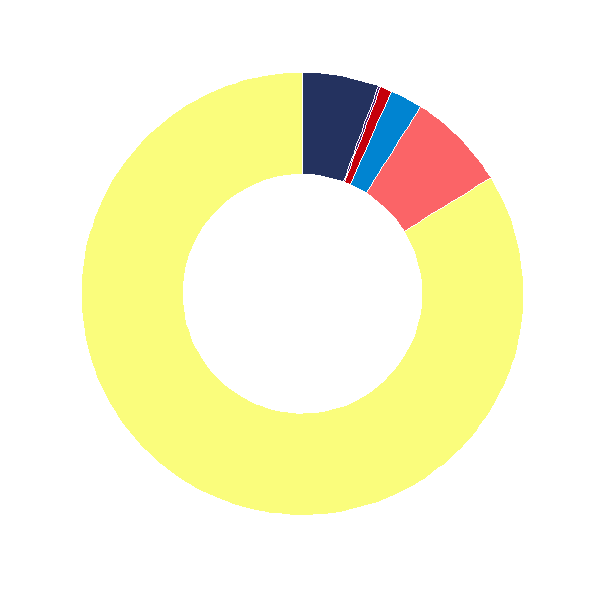

In [15]:
circle_bar('Pilot_Study')
png("../output_graph/demographics/Pilot_study.png", bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar('Pilot_Study')
dev.off()

png 
  2

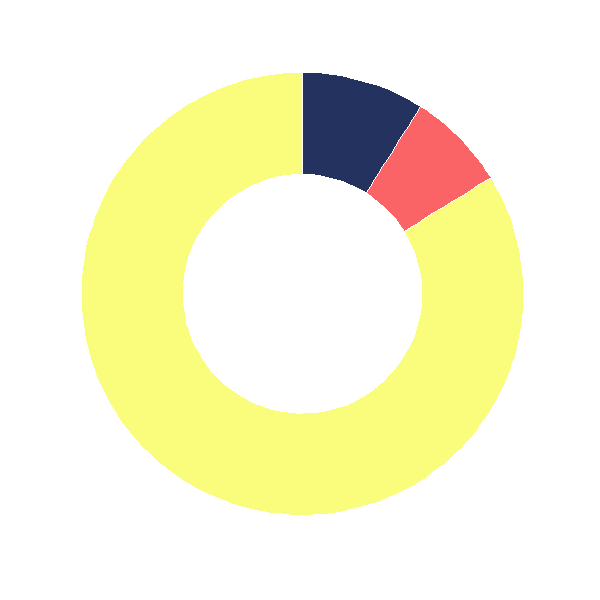

In [73]:
circle_bar_simple('Pilot_Study')
png("../output_graph/demographics/simple/Pilot_study.png", bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar_simple('Pilot_Study')
dev.off()

png 
  2

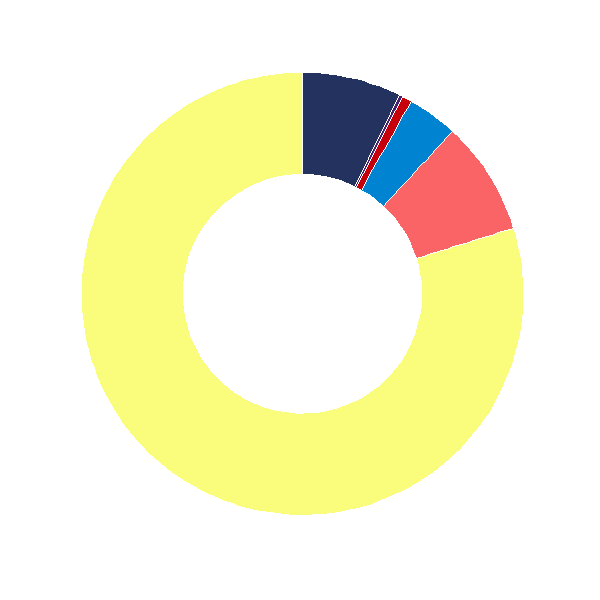

In [48]:
circle_bar('Study1')
png("../output_graph/demographics/Study1.png", bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar('Study1')
dev.off()

png 
  2

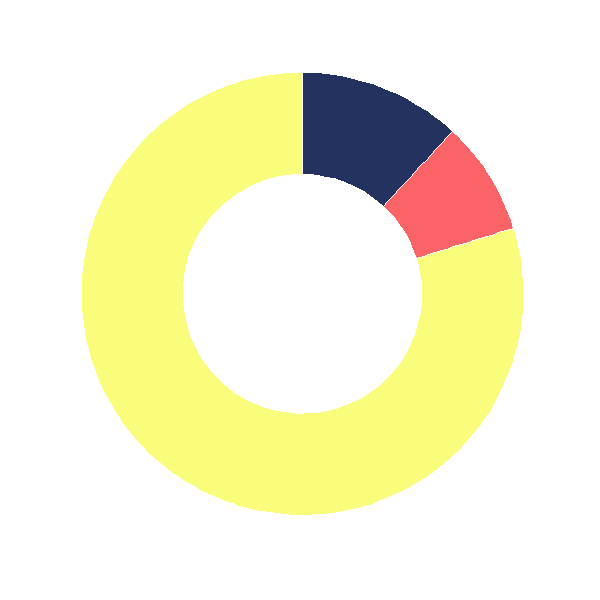

In [72]:
circle_bar_simple('Study1')
png("../output_graph/demographics/simple/Study1.png", bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar_simple('Study1')
dev.off()

png 
  2

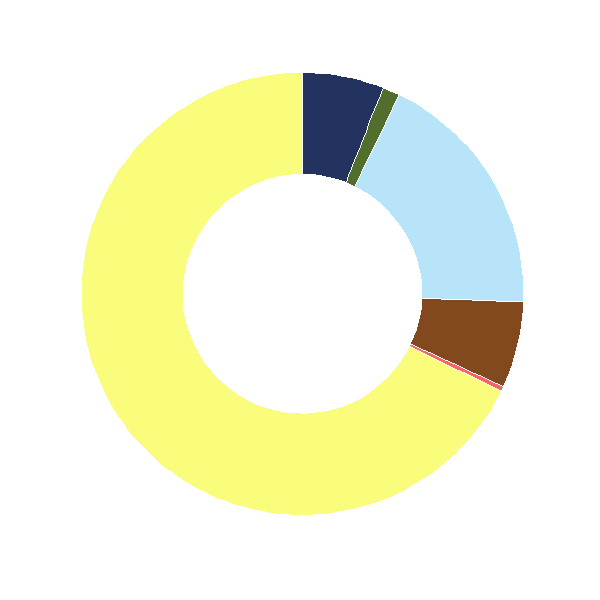

In [49]:
region = 'AU'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

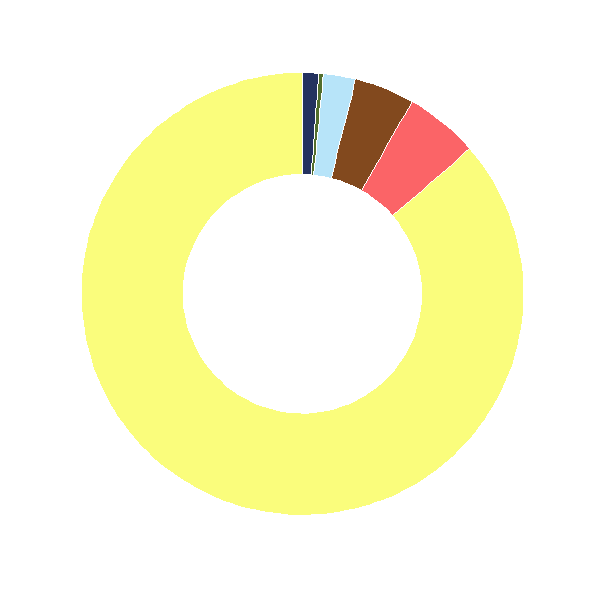

In [50]:
region = 'UK'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

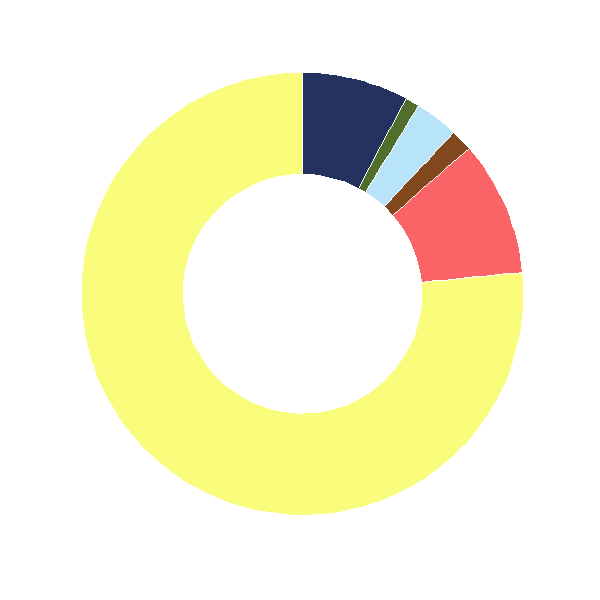

In [51]:
region = 'US'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

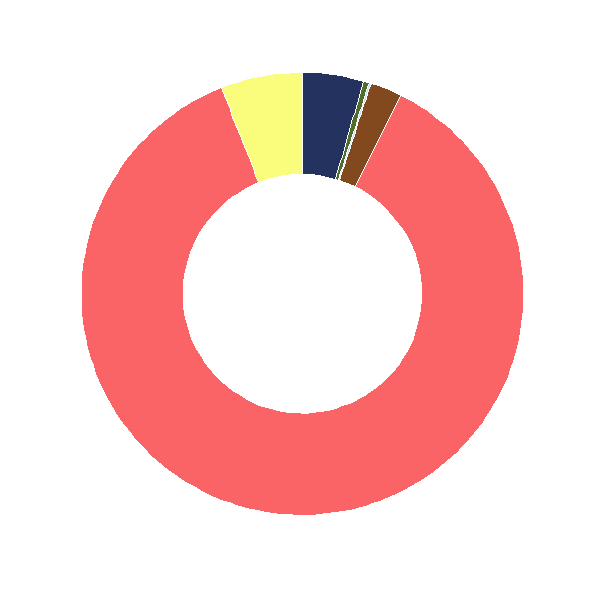

In [52]:
region = 'ZA'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

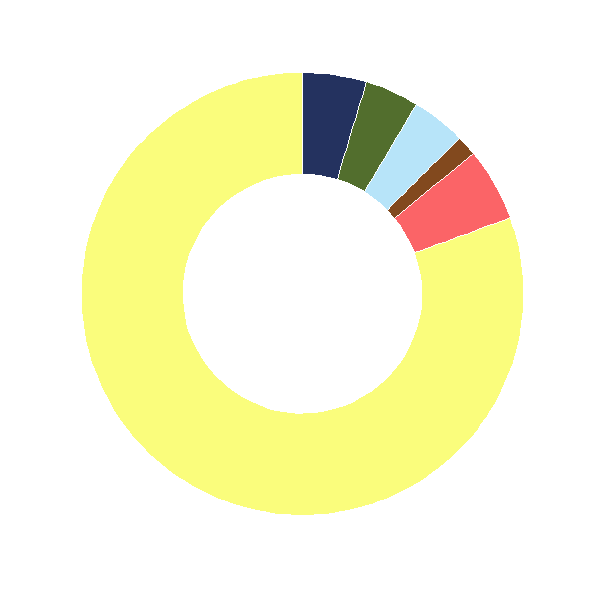

In [53]:
region = 'FR'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

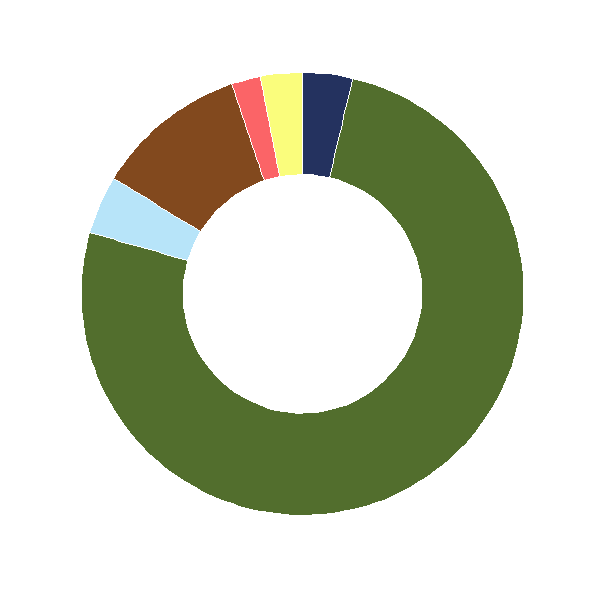

In [55]:
region = 'QA'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

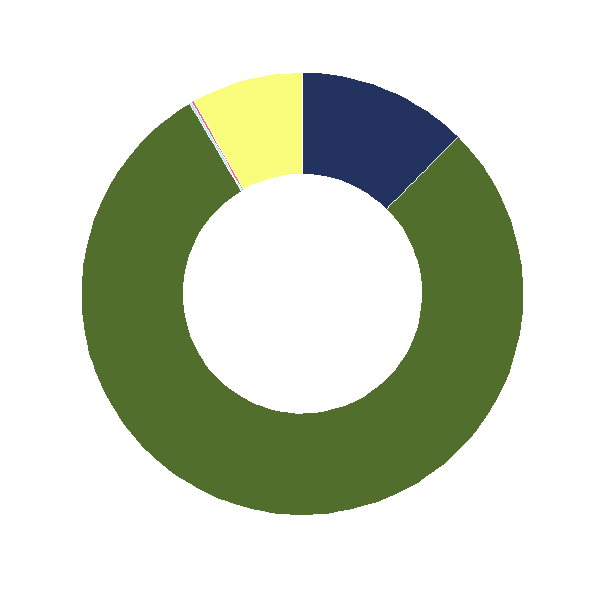

In [56]:
region = 'EG'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

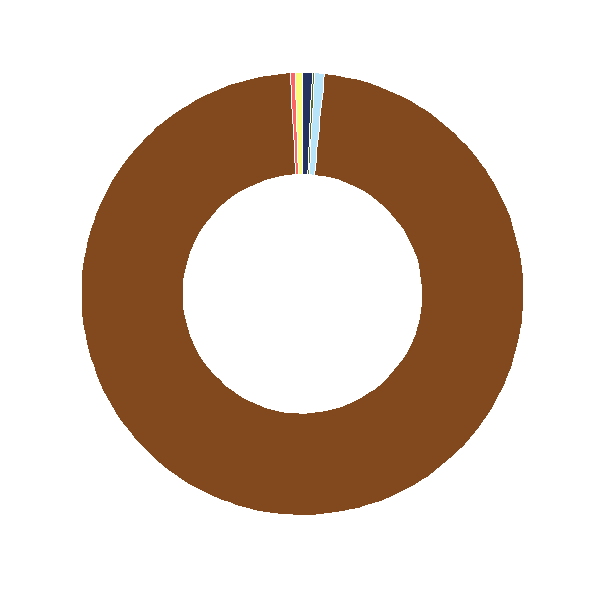

In [57]:
region = 'IN'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

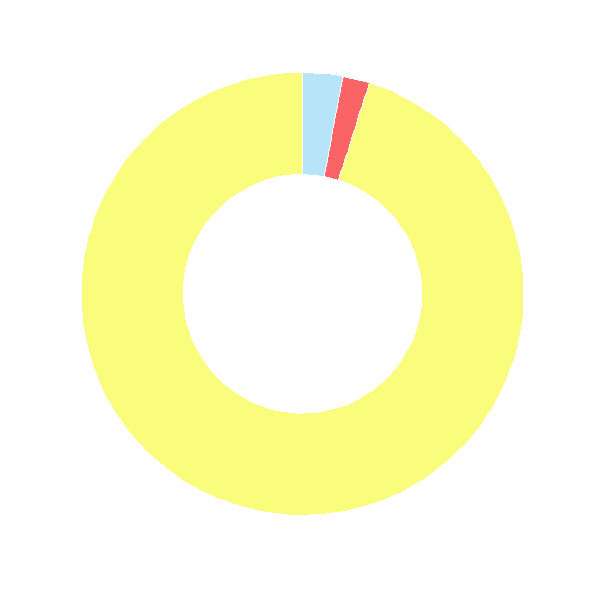

In [58]:
region = 'IL'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

## ES

png 
  2

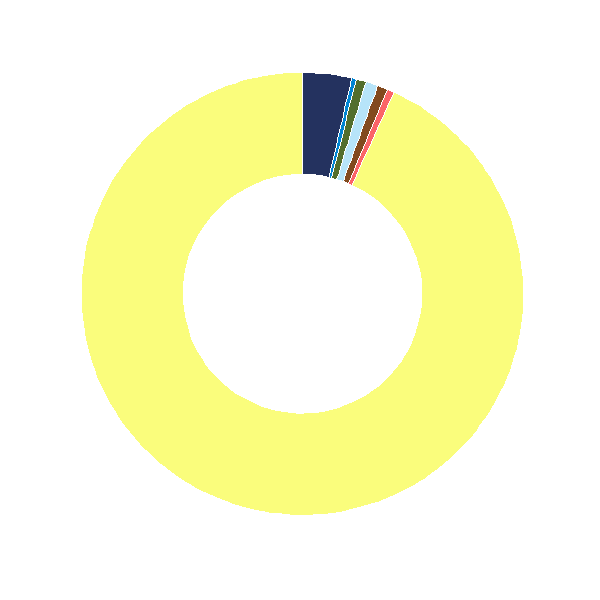

In [27]:
region = 'ES'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

## CN/HK

png 
  2

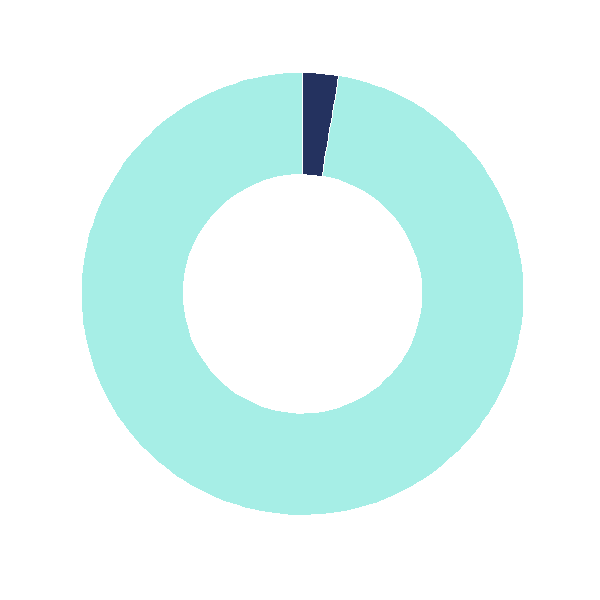

In [59]:
region = 'CN'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

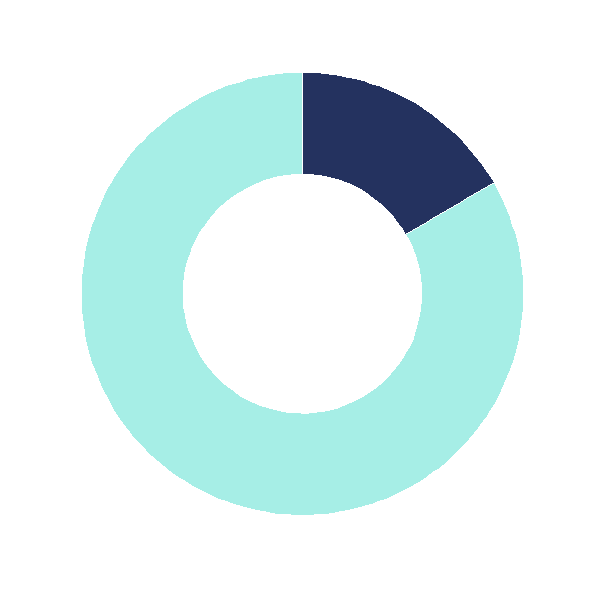

In [60]:
region = 'HK'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

## JP

png 
  2

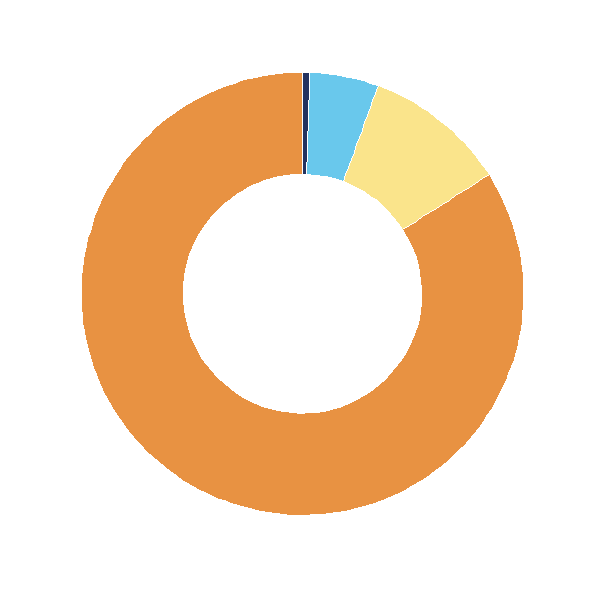

In [61]:
region = 'JP'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

## RU

png 
  2

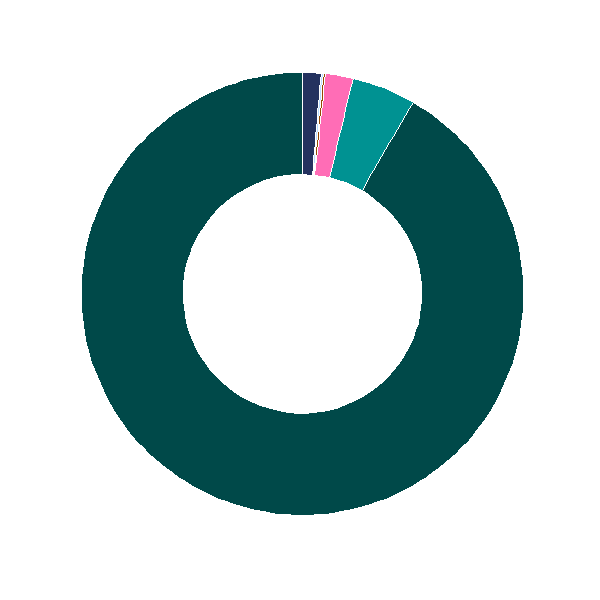

In [81]:
region = 'RU'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

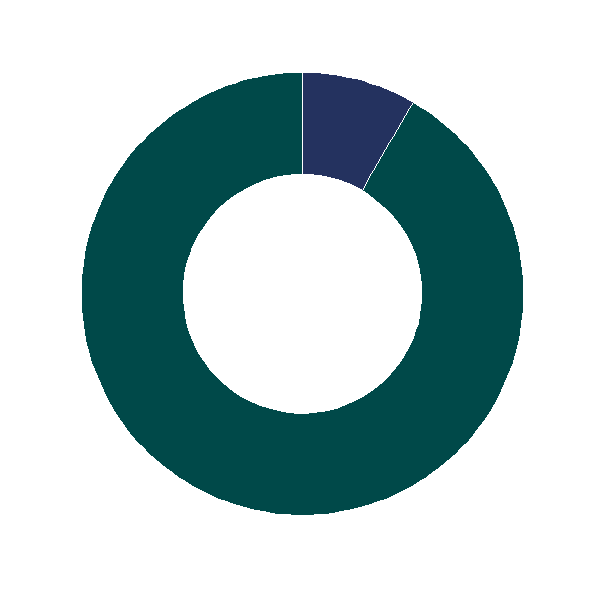

In [82]:
region = 'RU'
circle_bar_simple(region)
png(paste(paste("../output_graph/demographics/simple/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar_simple(region)
dev.off()

## DE

png 
  2

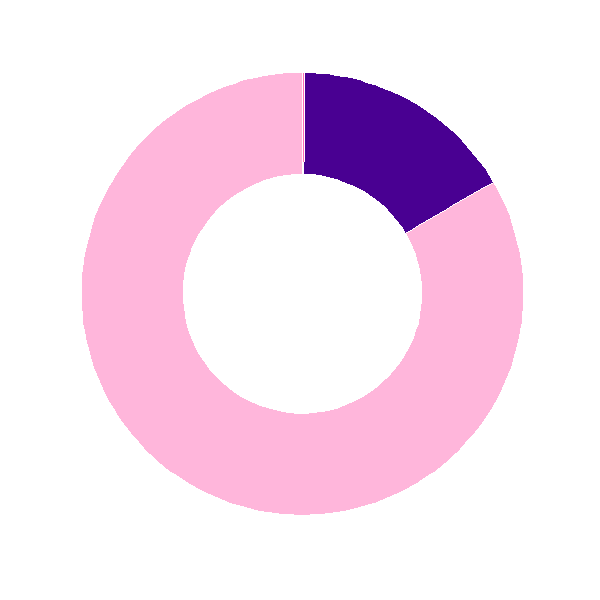

In [65]:
region = 'DE'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

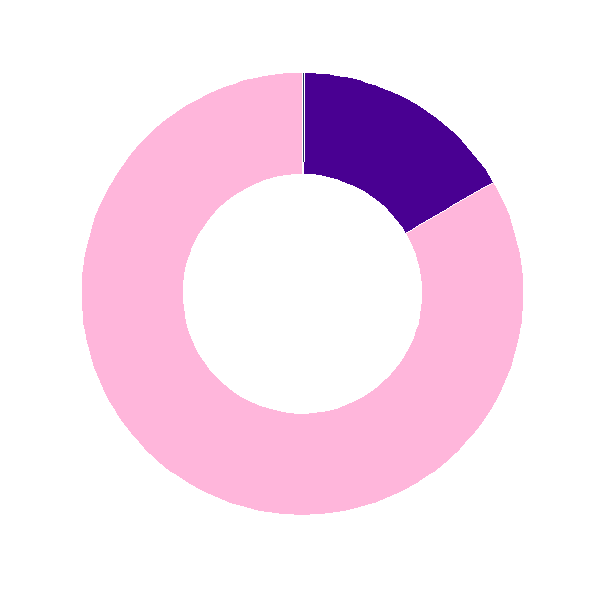

In [83]:
region = 'DE'
circle_bar_simple(region)
png(paste(paste("../output_graph/demographics/simple/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar_simple(region)
dev.off()

## BR

png 
  2

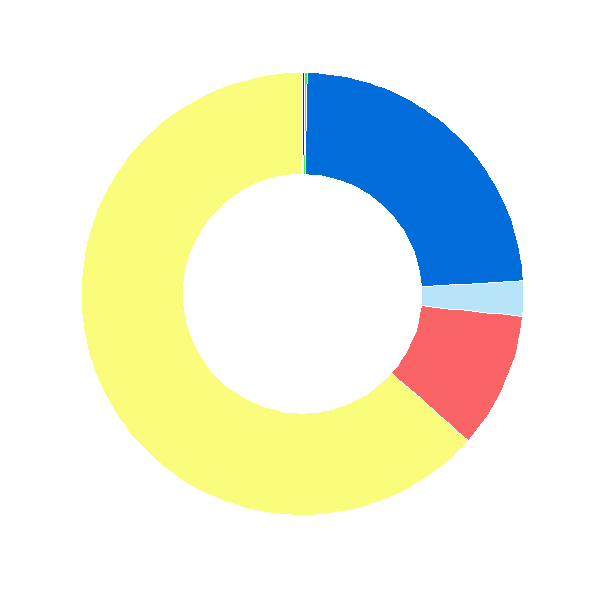

In [62]:
region = 'BR'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

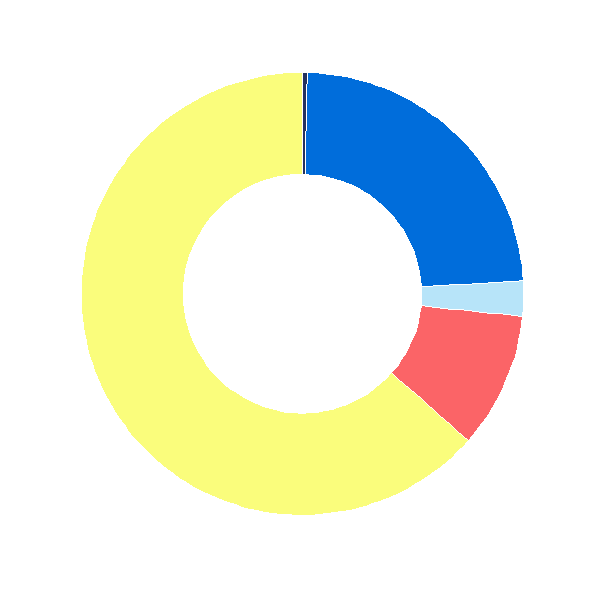

In [93]:
region = 'BR'
circle_bar_simple(region)
png(paste(paste("../output_graph/demographics/simple/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar_simple(region)
dev.off()

## MX

png 
  2

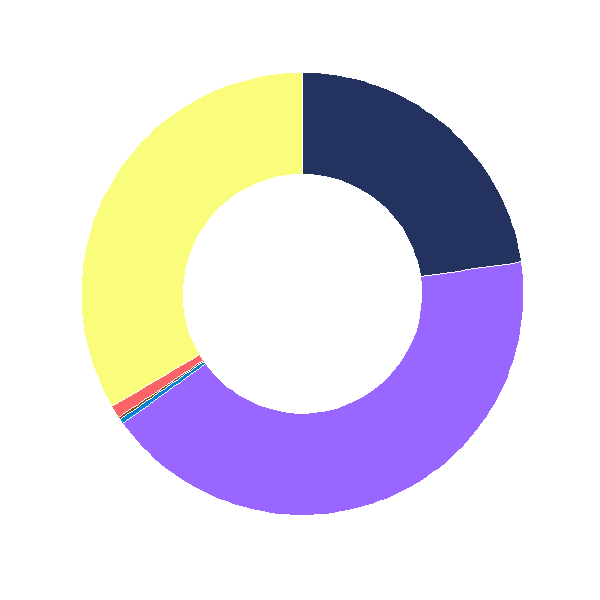

In [97]:
region = 'MX'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

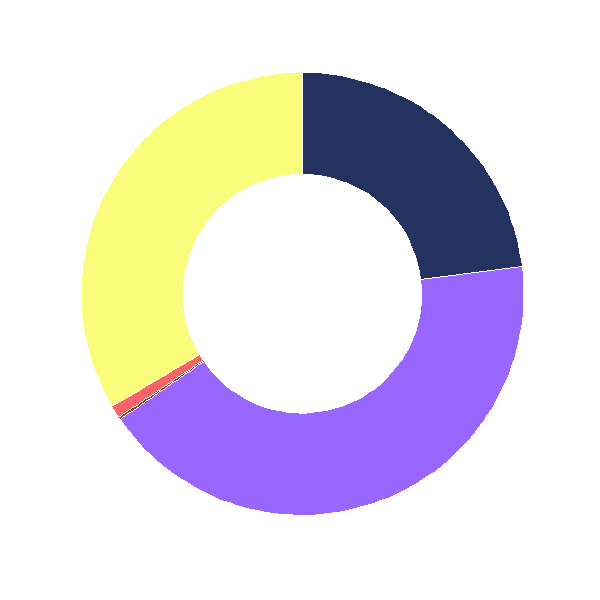

In [89]:
region = 'MX'
circle_bar_simple(region)
png(paste(paste("../output_graph/demographics/simple/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar_simple(region)
dev.off()

## CL

png 
  2

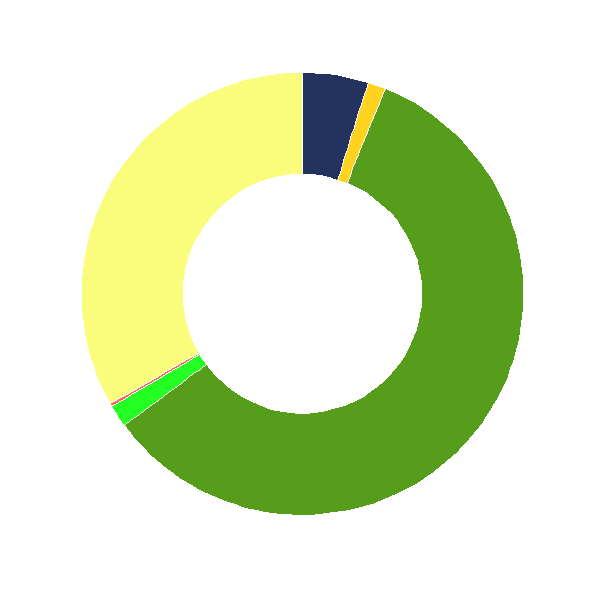

In [81]:
region = 'CL'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()

png 
  2

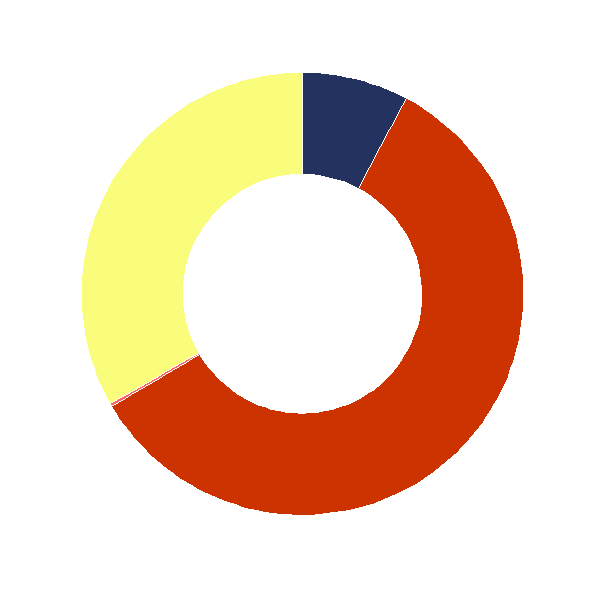

In [95]:
region = 'CL'
circle_bar_simple(region)
png(paste(paste("../output_graph/demographics/simple/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar_simple(region)
dev.off()

## PT

png 
  2

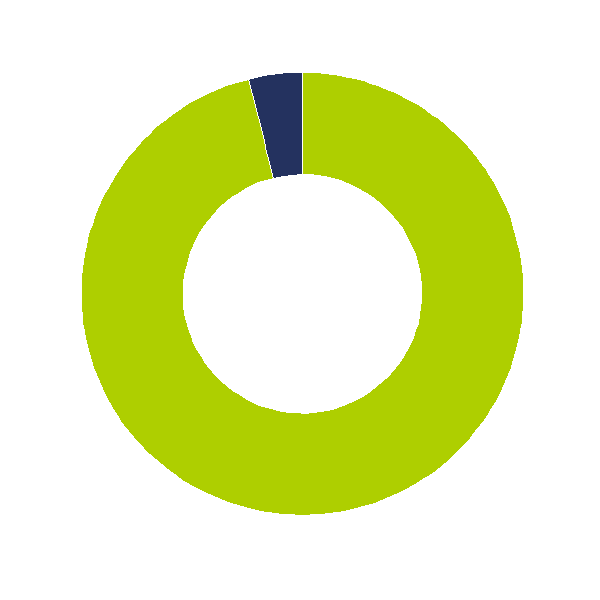

In [80]:
region = 'PT'
circle_bar(region)
png(paste(paste("../output_graph/demographics/",region,sep=""),".png",sep=""), bg="transparent",
    family = 'sans',units='in',width=5,height=5,res=300)
circle_bar(region)
dev.off()